### Download & load seed dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
df = pd.read_csv("https://raw.githubusercontent.com/sziccardi/CSCI4521_DataRepository/refs/heads/main/Seeds.csv")

### Create features and label matricies

In [2]:
# TODO: make a dataframe with only the selected features
features = df[['area', 'compactness']]

In [3]:
# TODO: make a dataframe with only the labels
labels = df['wheat_type']
labels.shape

(210,)

In [4]:
# TODO: move data from dataframes to numpy arrays
features = features.to_numpy()
labels = labels.to_numpy()

### Classifying new seeds

What type would we expect a seed with an area of 12 cm^2 and a compactness/roundness of 0.9? Guesses?

In [5]:
np.set_printoptions(suppress=True) #Set numpy to print not in scientific notation

In [6]:
# helper function for computing distance between points stored in 2 numpy arrays
def distance(p0, p1):
  'Computes squared euclidean distance'
  return np.sum( (p0-p1)**2 )

In [7]:
# TODO: create a numpy array for a hypothetcal seed's features so we can test!
test_seed = np.array([ [12, 0.9] ])
# TODO: find the distance between the test features and each set of features in our dataset
distances = np.array([ distance(test_seed, seed) for seed in features ])

In [8]:
# TODO: find the index where the distance was the smallest
index = np.argmin(distances)
print(index)

161


In [9]:
# TODO: are the nearest features close to the target features [14.0, 0.9]?
print(features[index])

[12.02    0.8503]


In [10]:
# TODO: What's the label of the nearest neighbor (1, 2, or 3)?
print(labels[index])

3


### Automating nearest neighbors classification:

In [11]:
# TODO: create helper function for classifying a single example of features (stored in numpy arrays!)
def nn_classify_sample(training_set, training_labels, new_example):
  # compute distances between new example and each example in the training set
  distances = np.array([ distance(new_example, example) for example in training_set ])
  # find the index of the smallest distance
  index = np.argmin(distances)
  # return the label of the nearest neighbor
  return training_labels[index]

In [12]:
# TODO: practice using classification function
label = nn_classify_sample(training_set=features, training_labels=labels, new_example=test_seed)
print(label)

3


In [13]:
# TODO: create helper function called nn_classify for classifying a set of example features (stored in numpy arrays!)
def nn_classify(training_set, training_labels, features):
  return np.array([nn_classify_sample(training_set, training_labels, feature) for feature in features])

### Drawing neighbor maps:

In [14]:
#Test every possible feature pair between min and max feature values
h = 0.1  # step size in the mesh
x_min, x_max = features[:, 0].min() - 0.2, features[:, 0].max() + 0.2
y_min, y_max = features[:, 1].min() - 0.2, features[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
test_features = np.array([xx.ravel(), yy.ravel()]).transpose()
print(test_features)

[[10.39    0.6081]
 [10.49    0.6081]
 [10.59    0.6081]
 ...
 [21.09    1.1081]
 [21.19    1.1081]
 [21.29    1.1081]]


In [15]:
z = nn_classify(features, labels, test_features)
print(z)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 3 3 3 1 3 3 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 3 1 3 3 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 1 3 1 3 1 3 3 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3
 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 1 3 3 3 3 1 1 3 3 3 3 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2 1 1 2 2 2 1 1 2 2 1 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3
 3 3 3 3 1 1 1 1 3 3 3 3 3 3 3 1 1 3 3 3 3 1 1 1 1 3 3 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 2 

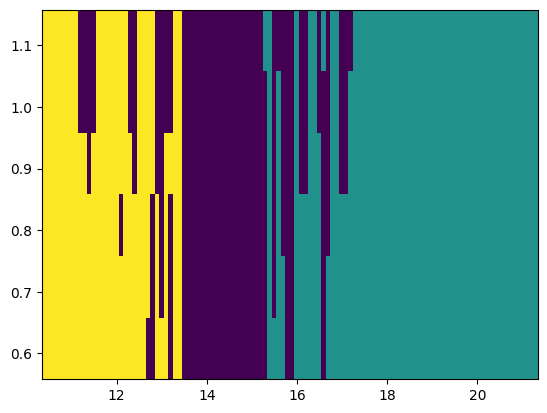

In [16]:
z = z.reshape(xx.shape)
fig = plt.figure()
plt.pcolormesh(xx, yy, z)

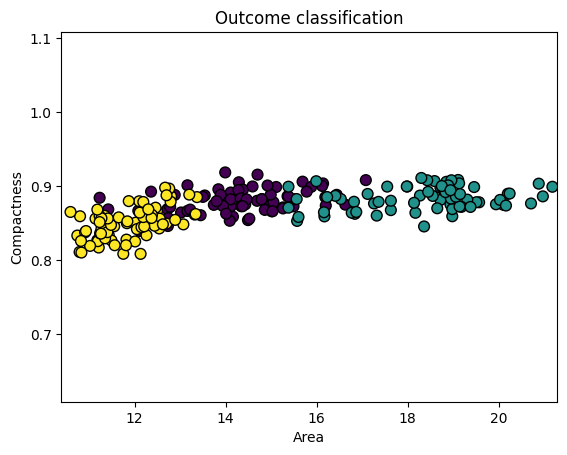

In [17]:
plt.scatter(features[:, 0], features[:, 1], c=labels, edgecolor='k', s=60)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Outcome classification")
plt.xlabel("Area")
plt.ylabel("Compactness")
plt.show()

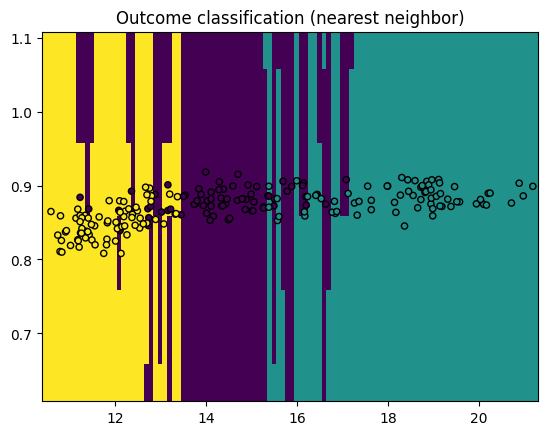

In [18]:
#Color mesh of predictions
z = z.reshape(xx.shape)
fig = plt.figure()
plt.pcolormesh(xx, yy, z)

#Scatter Plot of actual samples:
plt.scatter(features[:, 0], features[:, 1], c=labels, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Outcome classification (nearest neighbor)")
plt.show()

In [30]:
# Function that wraps up the classification and graphing with nicer colors

def graphClassifier2D(X,Y, classifier):
  # Create color maps
  cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFFF'])
  cmap_bold  = ListedColormap(['#FF0000', '#0000FF', '#00FFFF'])

  h = 0.1  # step size in the mesh
  x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
  y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  test_features = np.array([xx.ravel(), yy.ravel()]).transpose()
  z = classifier(X, Y, test_features)

  z = z.reshape(xx.shape)
  fig = plt.figure()
  plt.pcolormesh(xx, yy, z, cmap=cmap_light)

  plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold, edgecolor='k', s=20)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.title("Outcome classification (nearest neighbor)")
  plt.xlabel("Area")
  plt.ylabel("Compactness")
  plt.show()

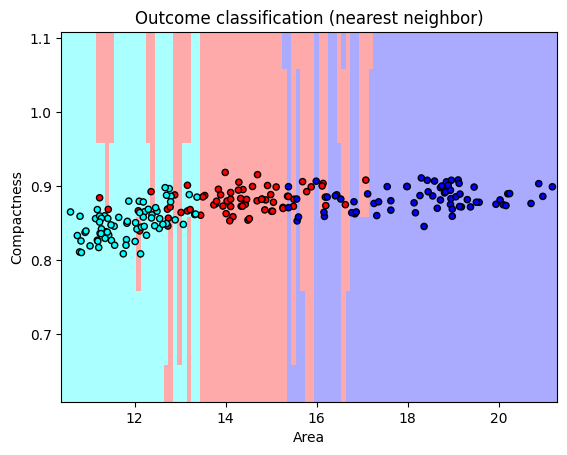

In [26]:
graphClassifier2D(features, labels, nn_classify)

Units don't match (cm vs cm^2), and ranges are vastly different (12-20 vs 0.8-0.95).

How can we fix this?

In [28]:
# TODO: add a normalization step to the distance calculation

def graphClassifier2D(X,Y, classifier, normalize=False):
  # Create color maps
  cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFFF'])
  cmap_bold  = ListedColormap(['#FF0000', '#0000FF', '#00FFFF'])

  # z-score normalization
  if normalize:
    X = (X - X.mean(axis=0)) / X.std(axis=0)

  h = 0.1  # step size in the mesh
  x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
  y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  test_features = np.array([xx.ravel(), yy.ravel()]).transpose()
  z = classifier(X, Y, test_features)

  z = z.reshape(xx.shape)
  fig = plt.figure()
  plt.pcolormesh(xx, yy, z, cmap=cmap_light)

  plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold, edgecolor='k', s=20)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.title("Outcome classification (nearest neighbor)")
  plt.xlabel("Area")
  plt.ylabel("Compactness")
  plt.show()

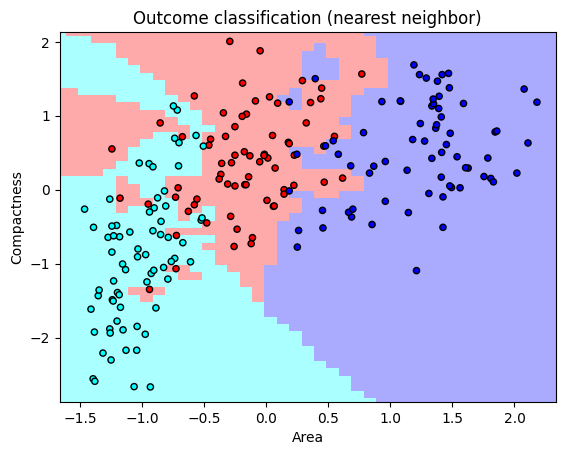

In [29]:
graphClassifier2D(features, labels, nn_classify, normalize=True)